# Welcome to **Arka!!** This notebook will give you a quick overview of the project!

#### So, let's setup the absolute path to our Scripts directory. :O

In [1]:
import sys
import os
sys.path.append(os.path.abspath('Scripts/'))

#### Let's check if it's working!!

In [2]:
import main_arka_pipeline

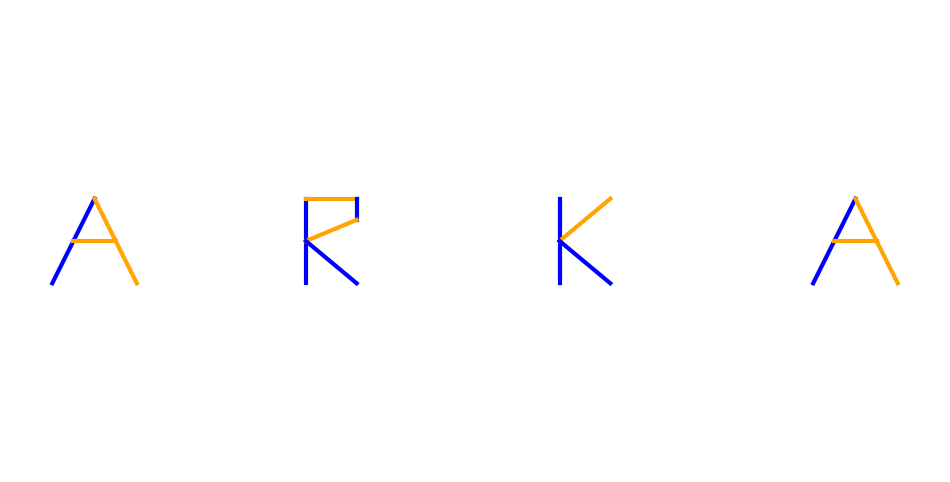

In [3]:
main_arka_pipeline.draw_arka_graph()

#### Great it's working!! ^v^ 
Now talking about the structure of the repo, the python notebooks inside the **Notebooks** directory depict the various scripts and plots that I worked with during the development of this project.
The **Scripts** folder is the brain of this project doing all the computations and stuff.
**requirements.txt** contains all the libraries used along with their versions.

For running it locally, go through the **README** file.

Now, let's get into the fun stuff!! \o/
The data is collected from the **Indian Space Science Data Center's (ISSDC)** official website: https://www.issdc.gov.in/
The downloaded data is in the form of CDF files. (https://cdf.gsfc.nasa.gov/) We are using the Level 2 (V02) data.
Then using **SpacePy** the data is collected from the CDF files. 

#### Some important plots of Bulk Parameters are as follows:

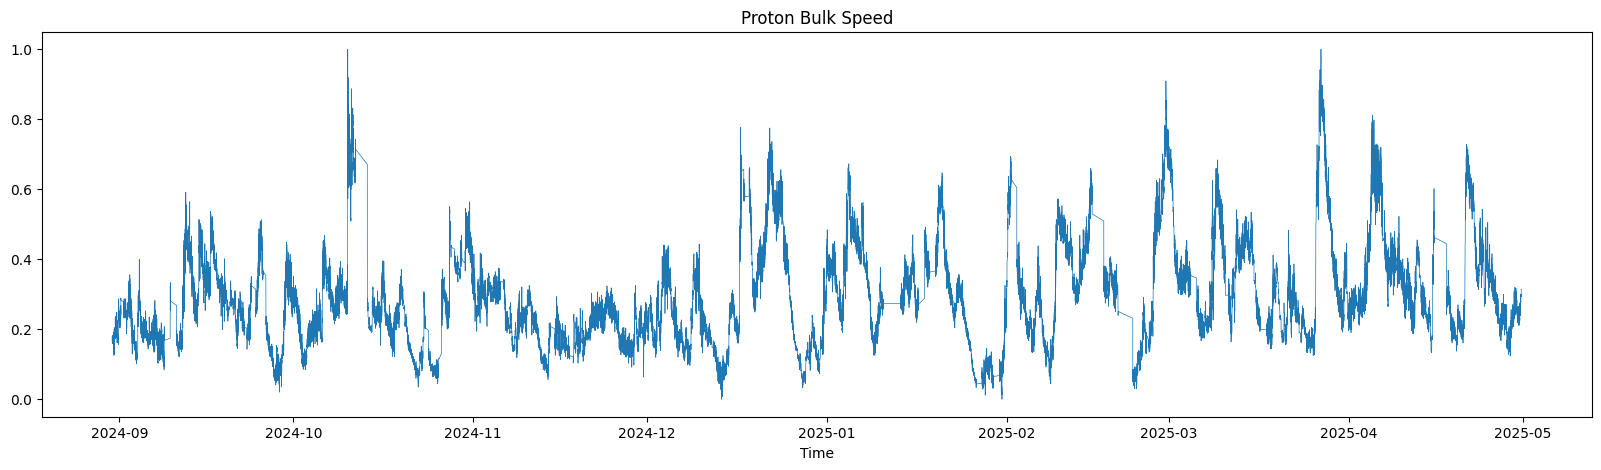

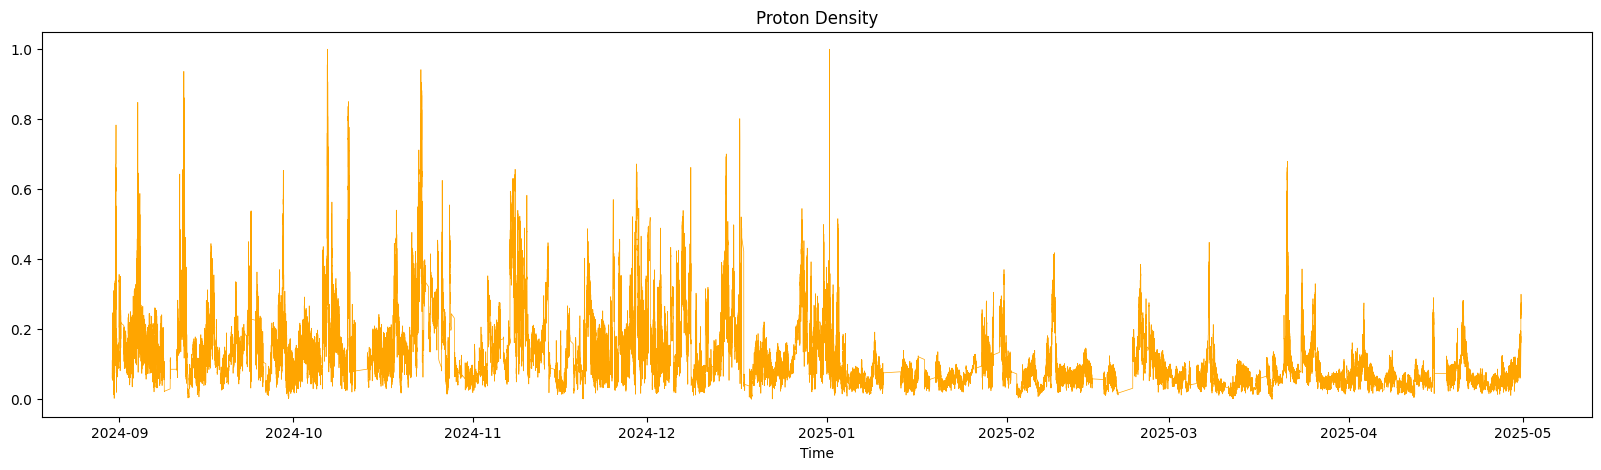

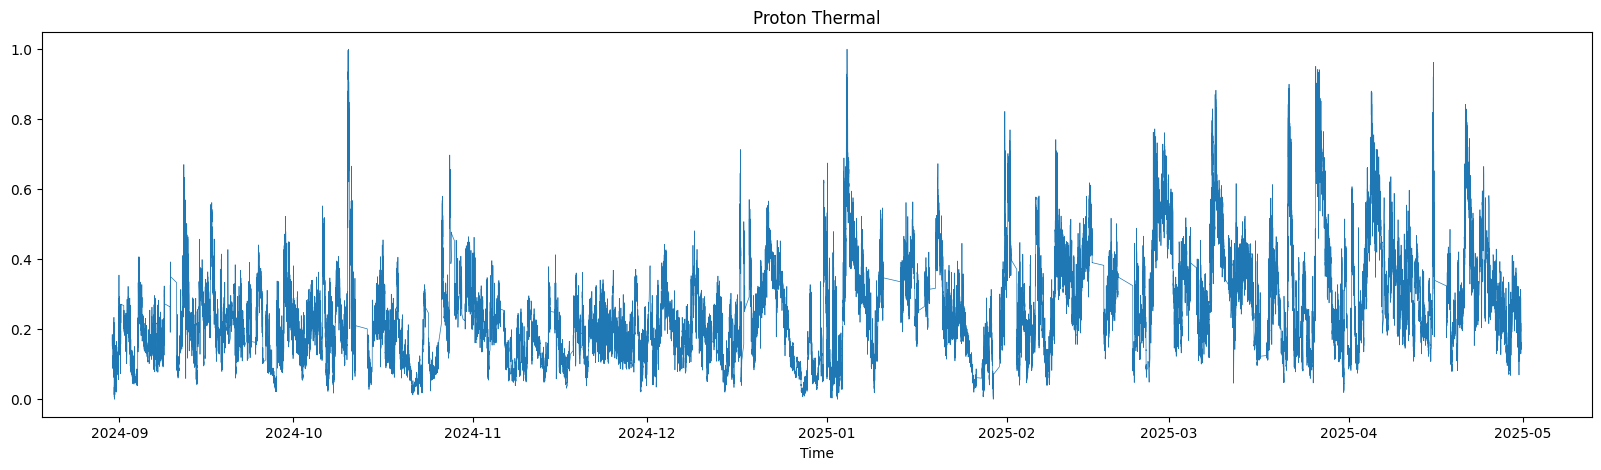

In [4]:
main_arka_pipeline.bulk_plots()

For more plots regarding bulk parameters, checkout Notebooks/02-explore-solar-data.

Now as we have gotten the input data, let's move on to out outputs.
We will be using the **CACTus's LASCO quicklook CME catalog** (https://www.sidc.be/cactus/catalog.php) for our outputs.

#### Here is a plot that shows the CME that have occured during our timeset:

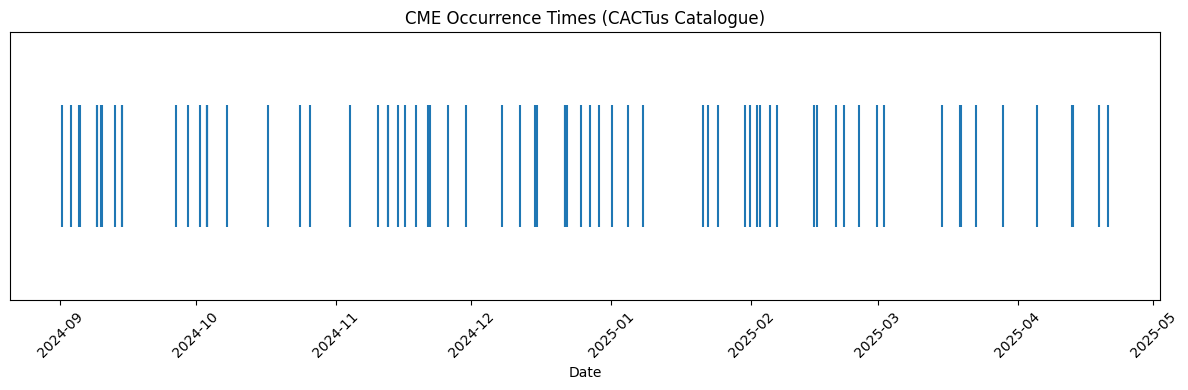

In [5]:
main_arka_pipeline.cme_plots()

Checkout Notebooks/03-visualize-parameters-vs-cmes for side by side comparison of parameters and the CME occurences.

The CACTus data is collected near the Sun, while our particle data is collected at L1 point(1.5 million km  away from Earth). So, there's a delay in the particle spikes, therefore, while creating the CME labels a small window of ± 30 minutes is used.

---

Our model uses **feature Engineering** to develop parameters like **delta speed**(This captures the rate of change (or velocity variation)), **rolling thermal mean**(Computes the rolling mean (average) of proton thermal values over a window of 5 rows) and **rolling density mean**(Same as rolling thermal mean, but applied to the proton density).

We are using an imbalanced data i.e. many non-CME data points, few CME ones, to balance this data **imblearn's RandomUnderSampler** is used. (Reference: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

To train the data, we are using **sklearn's RandomForestClassifier** (Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with class weight(1:3) to focus more on the CMEs.

The model is stored in a .pkl file using **joblib**.

---

Now taking a look at our dataset, we are taking in 8 months of data (from sept 2024 to april 2025) and split it in half. 
The first half of the data (sept 2024 to dec 2024) will be used as training data where 20% of the data is used for training and 80% of the data is used for testing.

#### Enough yapping, let's see it practically working!!

Let's plot the graph between the weighted signal, actual CMEs and predicted CMES along with their reports.

First up, The training set(20% data of this data was used for training)

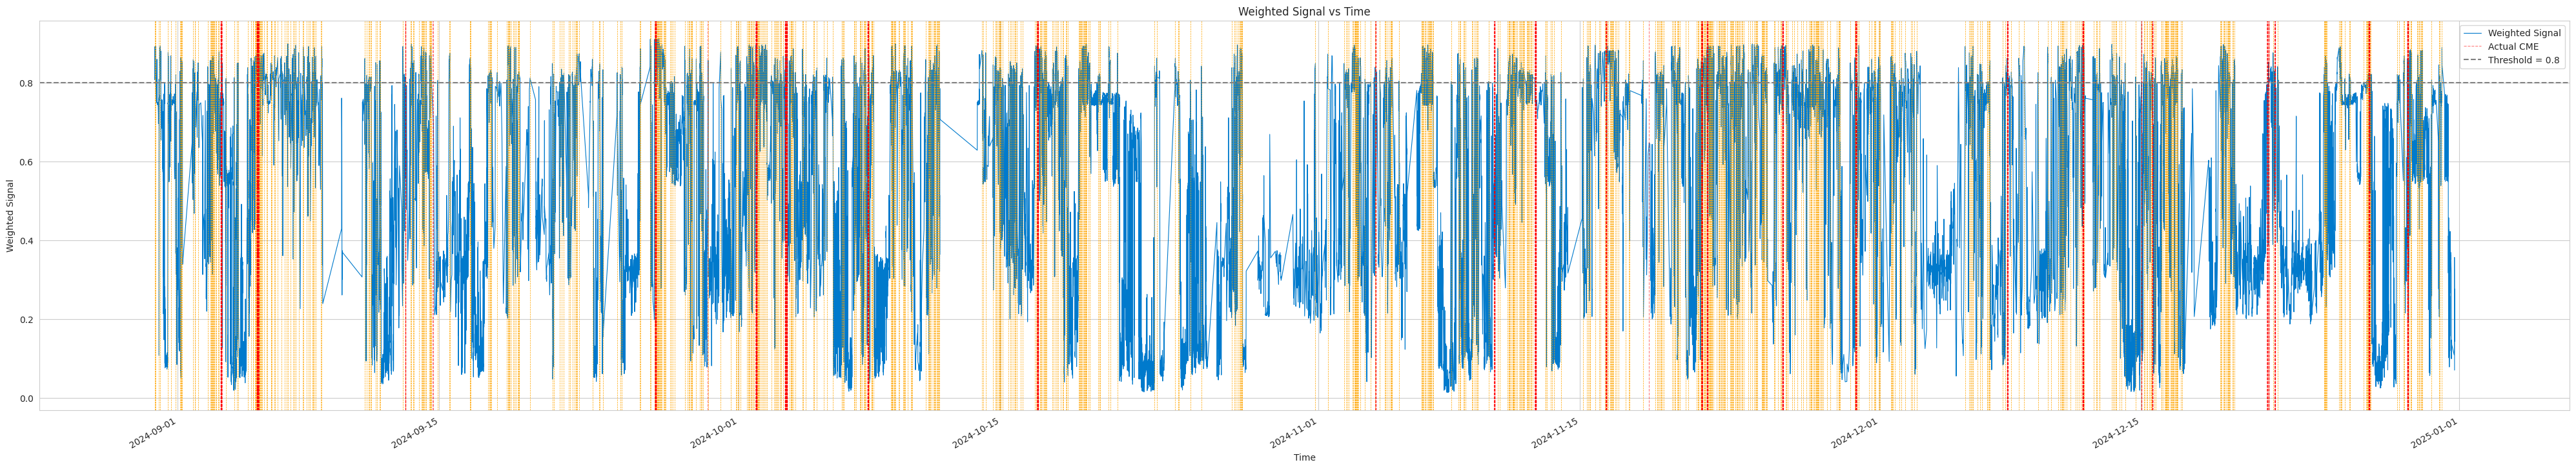

Generating report...

=== CME Window Evaluation ===
Detection Rate: 80.95%


In [6]:
main_arka_pipeline.plot_training_set()

Now, introducing the model to a completely new dataset(Untrained).

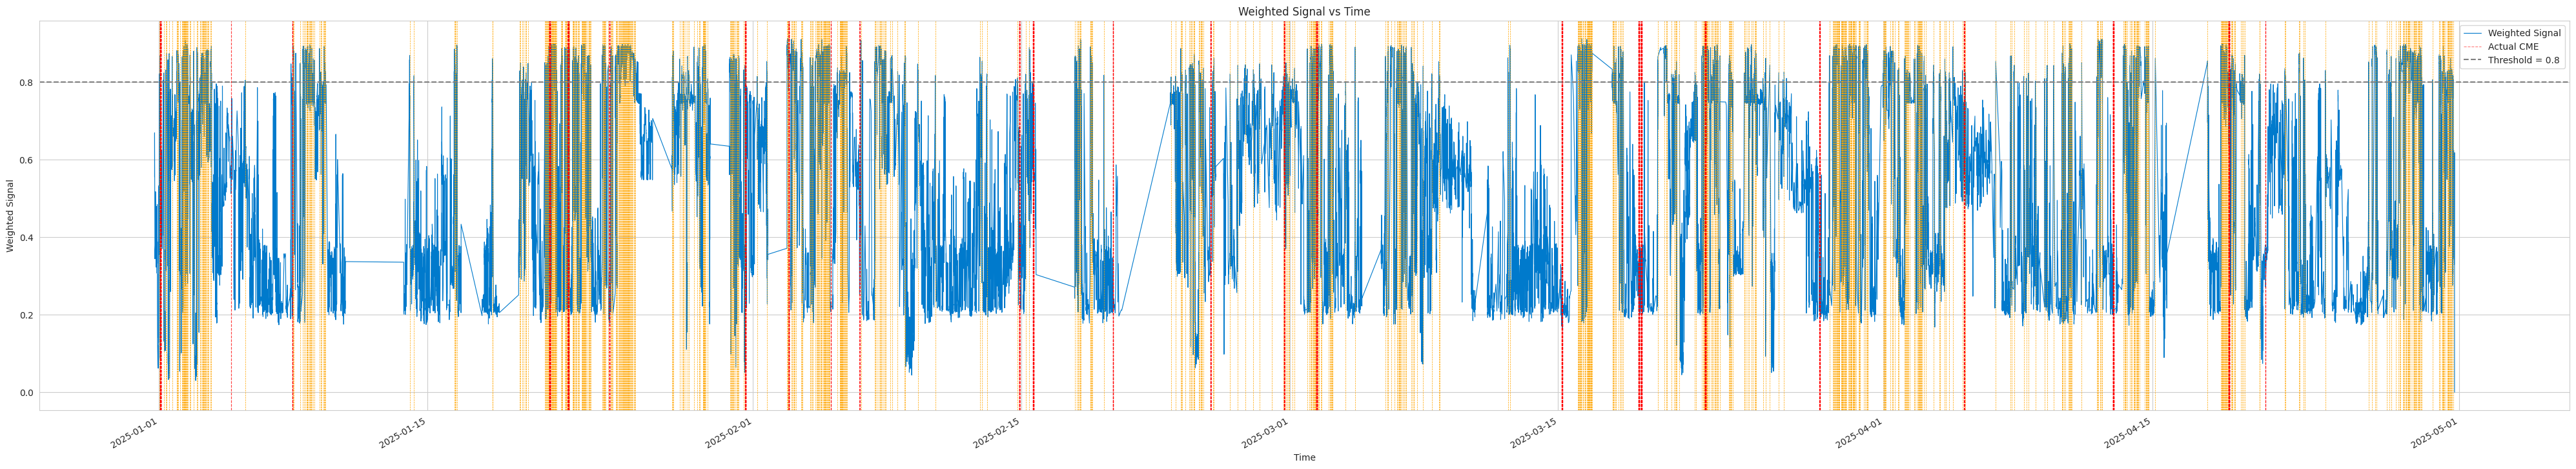

Generating report...

=== CME Window Evaluation ===
Detection Rate: 62.07%


In [7]:
main_arka_pipeline.plot_untrained_set()

The report checks for CME detection within ±120 minutes of CACTus CMEs.

---

## Future Improvements:

+ Training the model on a larger dataset(currently limited because of my system).
+ Using more featured parameters for more precise predictions.
+ Using flux and energy parameters.
+ Using more accurate window frame to factor in the delay for the CACTus CMEs.

---

# THANKS FOR CHECKING OUT MY PROJECT (>w<)/ 